## Introduction to Binary Search
A searching algorithm is a limited search space. Only applicable when sorted.

### Find X in a sorted array
Consider the sorted array [3,4,6,7,9,12,16,17]  
We have to find 6  
The below shows how to find 6 using binary search
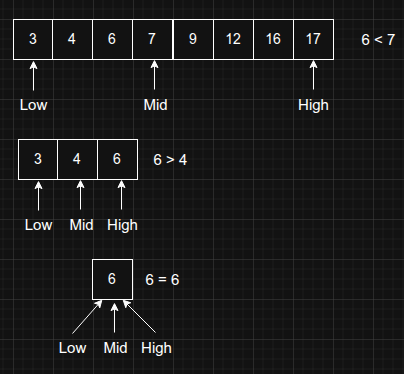

In [1]:
arr = [3,4,6,7,9,12,16,17]
target = 6
low = 0
high = len(arr) - 1
while low <= high:
    mid = int((low+high)/2)
    if arr[mid] == target:
        print(mid)
        break
    elif target > arr[mid]:
        low = mid+1
    else:
        high = mid-1
print(-1)

2
-1


In [8]:
# Using Recursion
def binarySearch(arr,low,high,target):
    if low > high:
        return -1
    mid = int((low+high)/2)
    if arr[mid] == target:
        return mid
    elif target > arr[mid]:
        return binarySearch(arr,mid+1,high,target)
    return binarySearch(arr,low,mid-1,target)

arr = [3,4,6,7,9,12,16,17]
target = 12

print(binarySearch(arr,0,len(arr)-1,target))

5


#### Time Complexity
We are divide the array into 2 for every iteration  
The time complexity is O(log<sub>2</sub> n)

### Lower Bound
The smallest index such that the number at that index is greater than or equal to the given number.  
Consider the array [3,5,8,15,19]  
Ex: x = 9, here 5 >= 9 at index 3 so 3 is the lower bound.  
If none of the element satisfy  the condition, then size of the array is the lower bound.

#### Using binary search
Consider the below array and x = 1  
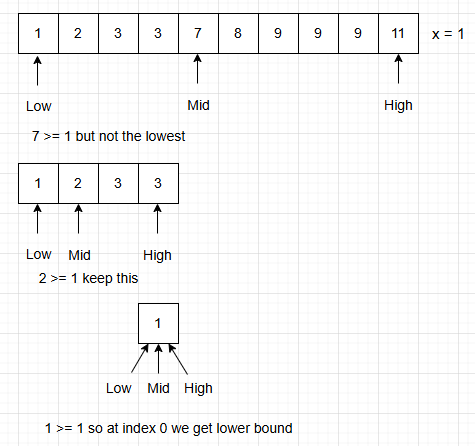

In [ ]:
# Using binary search
arr = [1,2,3,3,7,8,9,9,9,11]
target = 1
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] >= target:
        ans = mid
        high = mid-1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

0


### Upper Bound
The smallest index such that arr[index] > x.

In [4]:
# Using binary search
target = 6
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] > target:
        ans = mid
        high = mid -1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

4


### Search insert position
Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.  
Consider array [1,2,4,7], x = 6 is inserted then array = [1,2,4,6,7]. When we insert 6, 7 will be pushed back and 6 will take 7's place.  
This problem is similar to lower bound.

In [ ]:
# Using binary search
arr = [1,2,4,7]
target = 6
low = 0
high = len(arr) - 1
ans = len(arr)
while(low <= high):
    mid = int((low+high)/2)
    if arr[mid] >= target:
        ans = mid
        high = mid-1
    else:
        low = mid+1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

3


### Floor and ceil in a sorted array
Floor: largest no in array <= target  
Ceil: smallest no in array >= target  
Consider the array [10,20,30,40,50], target = 25  
Here floor: 20 and ceil: 30

To find the floor it is similar to the lower bound with the change in condition and also ceil is same as lower bound

In [11]:
def floor(arr,target):
    low = 0
    high = len(arr) - 1
    ans = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] <= target:
            ans = arr[mid]
            low= mid + 1
        else:
            high = mid - 1
    return ans

def ceil(arr,target):
    low = 0
    high = len(arr) - 1
    ans = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] >= target:
            ans = arr[mid]
            high = mid -1
        else:
            low = mid +1
    return ans

arr = [10,20,30,40,50]
target = 25
print("Floor:",floor(arr,target))
print("Ceil:",ceil(arr,target))
# Time complexity: O(2 log n)
# Space complexity: O(1)

Floor: 20
Ceil: 30


### First and Last occurance of a number
Consider the array: [2,4,6,8,8,8,11,13], the given target is 8, we have to find first and last index of 8 here [3,5]


In [ ]:
# Brute force: Using linear search
first = -1
last = -1
arr = [2,4,6,8,8,8,11,13]
target = 8
for i in range(len(arr)):
    if arr[i]==target:
        if first==-1:
            first = i
        last = i
print([first,last])
# Time complexity: O(n)
# Space complexity: O(1)

[3, 5]


#### Using binary search
first occurance -> lower_bound(target)  
last occurance -> upper_bound(target) - 1

In [ ]:
# Optimal: Upper bound and lower bound
def lower_bound(arr,target):
    low = 0
    high = len(arr) - 1
    ans = len(arr)
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] >= target:
            ans = mid
            high = mid -1
        else:
            low = mid +1
    return ans

def upper_bound(arr,target):
    low = 0
    high = len(arr) - 1
    ans = len(arr)
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] > target:
            ans = mid
            high = mid -1
        else:
            low = mid +1
    return ans

arr = [2,4,6,8,8,8,11,13]
lb = lower_bound(arr,target)
up = upper_bound(arr,target)-1

if lb==len(arr) or arr[lb]!=target:
    # For extreme cases like if the element is not existing in the array
    print([-1,-1])
else:
    print([lb,up])

# Time complexity: O(2 log n)
# Space complexity: O(1)

[3, 5]


#### Using plain binary search
We will use 2 different binary search for first and last occurance  
For first  
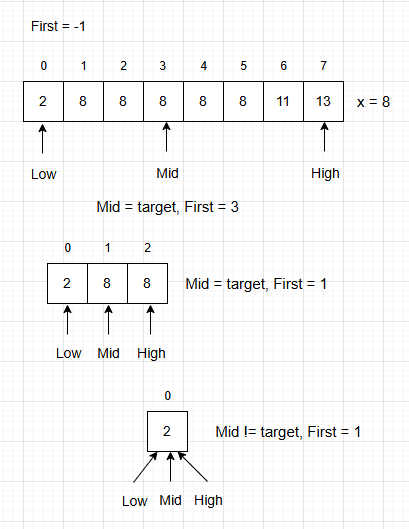  
Similary for last occurance go to right  
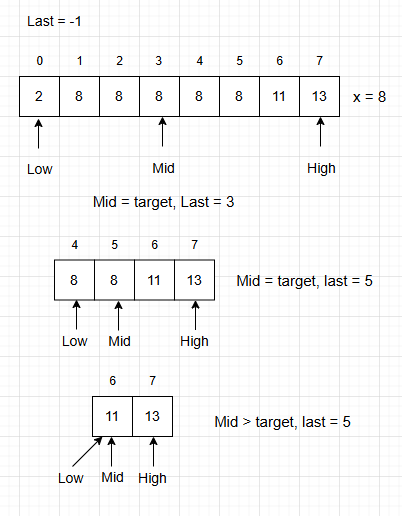


In [ ]:
# Optimal: Using binary search
def first(arr,target):
    low = 0
    high = len(arr)-1
    first = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            first = mid
            high = mid-1
        elif arr[mid]<target:
            low = mid+1
        else:
            high = mid-1
    return first

def last(arr,target):
    low = 0
    high = len(arr)-1
    last = -1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            last = mid
            low = mid+1
        elif arr[mid]<target:
            low = mid+1
        else:
            high = mid-1
    return last

print(first(arr,target))
print(last(arr,target))

# Time complexity: O(2 log n)
# Space complexity: O(1)

3
5


### Counting the number of occurances
Consider array [2,8,8,8,8,8,11,13], target = 8, we have to find out the total number of occurance of 8  
Here it is 5

We can count = last_occurance - first_occurance + 1, since the array is sorted.

In [9]:
# Using binary search
arr = [2,8,8,8,8,8,11,13]
target = 8
first = first(arr,target)
last = last(arr,target)
count = last - first + 1
print(count)

5


### Search in rotated sorted array I
Consider the array [7,8,9,1,2,3,4,5,6]  
The array is sorted and rotated at 3 places, if we re-do the rotation the array will look like [1,2,3,4,5,6,7,8,9]  
We have to search target = 1 in the rotated and sorted array.

First we have to identify the sorted half.  
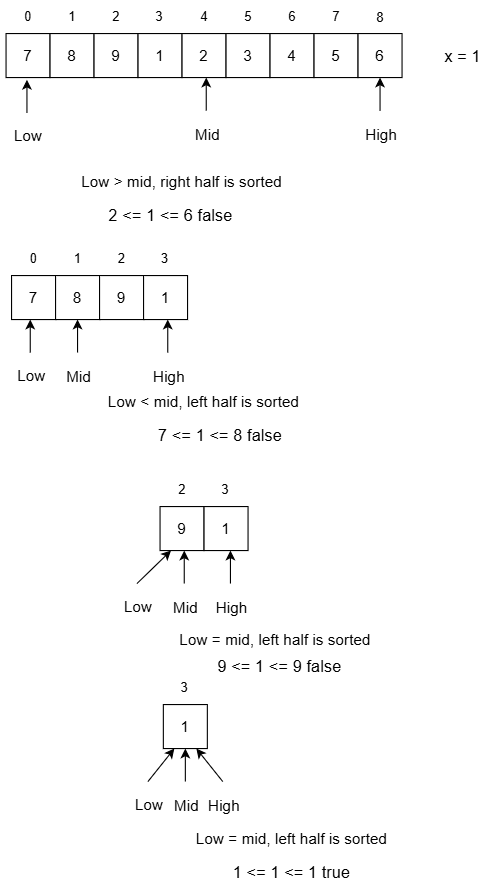  

In [3]:
# Using binary search
def rotatedSort(arr,target):
    low = 0
    high = len(arr)-1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            return mid
        # left is sorted
        if arr[low] <= arr[mid]:
            if arr[low] <= target and target <= arr[mid]:
                high = mid-1
            else:
                low = mid+1
        # right is sorted
        else:
            if arr[mid] <= target and target <= arr[high]:
                low = mid+1
            else:
                high = mid-1
    return -1
arr = [7,8,9,1,2,3,4,5,6]
target = 1
print(rotatedSort(arr,target))
# Time complexity: O(log n)
# Space complexity: O(1)

3


### Search in rotated sorted array II
Consider the following array - [7,8,1,2,3,3,3,4,5,6] ,the array rotated after sorting and it contains duplicates, We have search the target = 3 in the array.  

The only problem here is when finding which part is sorted we will encounter a scenario like  
arr[low] = arr[mid] = arr[high]  
Here we reduce the low and high by 1.

In [2]:
def rotatedSort(arr,target):
    low = 0
    high = len(arr)-1
    while low<=high:
        mid = int((low+high)/2)
        if arr[mid] == target:
            return True
        if arr[mid] == arr[low] and arr[mid] == arr[high]:
            low = low+1
            high = high-1
            continue
        # left is sorted
        if arr[low] <= arr[mid]:
            if arr[low] <= target and target <= arr[mid]:
                high = mid-1
            else:
                low = mid+1
        # right is sorted
        else:
            if arr[mid] <= target and target <= arr[high]:
                low = mid+1
            else:
                high = mid-1
    return False
arr = [7,8,1,2,3,3,3,4,5,6]
target = 3
print(rotatedSort(arr,target))
# Time complexity: O(log n) - average, because of duplicates we shrink the array at worst case: O(n/2)
# Space complexity: O(1)

True


### Minimum in rotated sorted array
Consider the array - [4,5,6,7,0,1,2], we have to find the out the minimum number in the array.

1. Identify the sorted half
2. The sorted half may or may not contain the minimum
3. Pick the minimum in the sorted half either low or mid and eliminated the sorted half
4. Either low = mid+1 or high = mid-1
5. Repeat from step-1

In [6]:
import sys
# Using binary search
def mini(arr):
    low = 0
    high = len(arr) - 1
    ans = sys.maxsize
    while low<=high:
        mid = int((low+high)/2)
        # If left is sorted
        if arr[low] <= arr[mid]:
            ans = min(ans,arr[low])
            low = mid+1
        # If right is sorted
        else:
            ans = min(ans,arr[mid])
            high = mid-1
    return ans
arr = [4,5,6,7,0,1,2]
print(mini(arr))
# Time complexity: O(log n)
# Space complexity: O(1)


0
